# Exploratory Data Analysis

In [81]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [82]:
#Read CSV-files
year2018 = pd.read_csv("../datasets/2018.csv", encoding="utf-8", sep=";")
year2019 = pd.read_csv("../datasets/2019.csv", encoding="utf-8", sep=";")
year2020 = pd.read_csv("../datasets/2020.csv", encoding="utf-8", sep=";")
year2021 = pd.read_csv("../datasets/2021.csv", encoding="utf-8", sep=";")
year2022 = pd.read_csv("../datasets/2022.csv", encoding="utf-8", sep=";")

csv_list = [year2018, year2019, year2020, year2021, year2022]

total_length = len(year2018) + len(year2019) + len(year2020) + len(year2021) + len(year2022)
print(total_length)

year2018.head()

90758


,doffin_id,eier_orgnr,eier_navn,eier_postadresse,tittel,publisering_dato,tilbudsfrist_dato,forskrift_navn,skjema_nr,skjema_type,cpv_hoved_kode,kontrakt_type,prosedyre_type,nuts_kode,verdi_estimert,delkontrakter,rammeavtale,dps,cpv_tillegg_kode
0,2018-790993,938521816,Eid kommune,R�dhusv. 11 Nordfjordeid 6770,Vegutbetring Ytre Sk�rhaug,2018-01-02,2018-01-24,Anskaffelsesforskriften,52,Notice,45233120.0,Bygge- og anleggsarbeid,�pen anbudskonkurranse,NO052,1500000.0,False,False,False,45233120
1,2018-127335,935478715,B�rum kommune,Postboks 700 Sandvika 1304,Sv�mmeanlegg p� Rud,2018-01-03,2018-02-02,Anskaffelsesforskriften,2,Notice,45000000.0,Bygge- og anleggsarbeid,Konkurranse med forhandling,NO,NaN,False,False,False,45212212
2,2018-934319,964965137,Sandnes Kommune.,R�dhuset Sandnes 4319,Parallell rammeavtale for leie av husv�re av m...,2018-01-03,NaN,Anskaffelsesforskriften,21,Award,85300000.0,Tjenester,NaN,NO043,NaN,False,False,False,85000000
3,2018-647797,996258130,Nedre Romerike Innkj�pssamarbeid NRI,S�rumsand,Rammeavtale for kj�p av frukt og gr�nnsaker ti...,2018-01-04,NaN,Anskaffelsesforskriften,3,Award,15300000.0,Varer,�pen anbudskonkurranse,NO012,NaN,False,False,False,NaN
4,2018-381344,996258130,Nedre Romerike Innkj�pssamarbeid NRI,S�rumsand,Rammeavtale p� dagligvare til mindre enheter,2018-01-03,NaN,Anskaffelsesforskriften,3,Award,15000000.0,Varer,�pen anbudskonkurranse,NO012,NaN,False,False,False,NaN


In [83]:
#Function for finding number of rows containing a given string

def search(df, filter_string):
    string_counter = 0
    for index, row in df.iterrows():
        if filter_string in row["tittel"] or filter_string.title() in row["tittel"] or filter_string.upper() in row["tittel"]:
            string_counter += 1

    percent_ratio = (string_counter / (len(df)-1)) * 100
    
    print("Antall kunngjøringer som inneholder ordet " + '"' + filter_string + '" i tittel-kolonne: ' + str(string_counter))
    print("Antall kunngjøringer totalt dette året: " + str(len(df)-1))
    print("Det utgjør " + str(round(percent_ratio, 2)) + " prosent av totalt antall kunngjøringer dette året")

def search_twostring(df, filter_string1, filter_string2):
    string_counter = 0
    for index, row in df.iterrows():
        if (filter_string1 in row["tittel"] or filter_string1.title() in row["tittel"] or filter_string1.upper() in row["tittel"]) and (filter_string2 in row["tittel"] or filter_string2.title() in row["tittel"] or filter_string2.upper() in row["tittel"]):
            string_counter += 1

    percent_ratio = (string_counter / (len(df)-1)) * 100
    
    print("Antall kunngjøringer som inneholder ordet " + '"' + filter_string1 + '" og "'+ filter_string2 + '" i tittel-kolonne: ' + str(string_counter))
    print("Antall kunngjøringer totalt dette året: " + str(len(df)-1))
    print("Det utgjør " + str(round(percent_ratio, 2)) + " prosent av totalt antall kunngjøringer dette året")


## Search function

In [84]:
print("Skriv inn søkeord: ")
search_string = input()
print(search_string)
print("")
search_string = search_string.lower()
year = 2018

if search_string == "":
    print("Søk avbrutt")
else:
    for yearCSV in csv_list:
        print("----------------------------------")
        print("ÅRSTALL: " + str(year))
        search(yearCSV, search_string)
        print("----------------------------------")
        print("")
        year += 1

Skriv inn søkeord: 
beredskap

----------------------------------
ÅRSTALL: 2018
Antall kunngjøringer som inneholder ordet "beredskap" i tittel-kolonne: 52
Antall kunngjøringer totalt dette året: 16740
Det utgjør 0.31 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2019
Antall kunngjøringer som inneholder ordet "beredskap" i tittel-kolonne: 47
Antall kunngjøringer totalt dette året: 17721
Det utgjør 0.27 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2020
Antall kunngjøringer som inneholder ordet "beredskap" i tittel-kolonne: 66
Antall kunngjøringer totalt dette året: 18026
Det utgjør 0.37 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2021
Antall kunngjøringer som inneholder ordet "beredskap" i tittel-kolonne: 45
Antall kunngjøringer totalt d

In [85]:
filter_string1 = "beredskap"
filter_string2 = "innovasjon"
print("")
year = 2018

for yearCSV in csv_list:
    print("----------------------------------")
    print("ÅRSTALL: " + str(year))
    search_twostring(yearCSV, filter_string1, filter_string2)
    print("----------------------------------")
    print("")
    year += 1


----------------------------------
ÅRSTALL: 2018
Antall kunngjøringer som inneholder ordet "beredskap" og "innovasjon" i tittel-kolonne: 0
Antall kunngjøringer totalt dette året: 16740
Det utgjør 0.0 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2019
Antall kunngjøringer som inneholder ordet "beredskap" og "innovasjon" i tittel-kolonne: 0
Antall kunngjøringer totalt dette året: 17721
Det utgjør 0.0 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2020
Antall kunngjøringer som inneholder ordet "beredskap" og "innovasjon" i tittel-kolonne: 0
Antall kunngjøringer totalt dette året: 18026
Det utgjør 0.0 prosent av totalt antall kunngjøringer dette året
----------------------------------

----------------------------------
ÅRSTALL: 2021
Antall kunngjøringer som inneholder ordet "beredskap" og "innovasjon" i tittel-kolonne: 0
An

## Split into separate CSV-files if title containing the word "beredskap"

In [86]:
filter_string = "beredskap"

def isolate(df, filter_string):
    return df[df["tittel"].str.contains(filter_string) | df["tittel"].str.contains(filter_string.title())| df["tittel"].str.contains(filter_string.upper()) ]

ber_year2018 = isolate(year2018, filter_string)
ber_year2019 = isolate(year2019, filter_string)
ber_year2020 = isolate(year2020, filter_string)
ber_year2021 = isolate(year2021, filter_string)
ber_year2022 = isolate(year2022, filter_string)

ber_csv_list = [ber_year2018, ber_year2019, ber_year2020, ber_year2021, ber_year2022]
ber_year2022

            

,doffin_id,eier_orgnr,eier_navn,eier_postadresse,tittel,publisering_dato,tilbudsfrist_dato,forskrift_navn,skjema_nr,skjema_type,cpv_hoved_kode,kontrakt_type,prosedyre_type,nuts_kode,verdi_estimert,delkontrakter,rammeavtale,dps,cpv_tillegg_kode
53,2022-300328,983544622,Helsedirektoratet,Postboks 220 Sk�yen OSLO 0213,Salgs- og distribusjonsavtale for beredskapsle...,2022-02-23,NaN,Anskaffelsesforskriften,15,Intention,63120000.0,Tjenester,NaN,NO08,NaN,False,False,False,60100000\n60112000\n79991000
109,2022-300735,952540556,R�lingen kommune,Fjerdingby,Beredskapsavtale vann og avl�p,2022-02-04,2022-03-09,Anskaffelsesforskriften,2,Notice,90400000.0,Tjenester,�pen anbudskonkurranse,NO082,NaN,False,False,False,45232100\n71311000
457,2022-303493,964338531,Bergen kommune - Etat for utbygging,Serviceboks 7880 BERGEN 5020,IK-FOR 005-2022 Beredskap- og karantenehotell ...,2022-05-10,2022-06-01,Anskaffelsesforskriften,102,Notice,55100000.0,Tjenester,NaN,NO0A2,600000.0,False,False,False,NaN
644,2022-305017,913602110,REN Sj�kabelberedskap AS,Fantoftvegen 2 Bergen 5072,Anskaffelse 1. og 2. linje maritim beredskap,2022-06-29,2022-08-22,Anskaffelsesforskriften,2,Notice,60630000.0,Tjenester,Konkurranse med forhandling,NO,500000000.0,False,True,False,31321500\n60630000
667,2022-305199,983744516,Folkehelseinstituttet,Lovisenberggata 8 OSLO 0456,Nasjonal vaksineberedskap mot pandemisk influensa,2022-04-21,2022-05-19,Anskaffelsesforskriften,2,Notice,33651660.0,Varer,�pen anbudskonkurranse,NO,750000000.0,True,False,False,33651600\n33651660\n33651660\n33651600\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18252,2022-981149,994598759,Norsk Helsenett SF,Abels gate 9 TRONDHEIM 7030,22/00364 Avtale om kj�p av lager- og distribus...,2022-09-15,NaN,Anskaffelsesforskriften,3,Award,63120000.0,Tjenester,�pen anbudskonkurranse,NO,NaN,False,False,False,60000000\n
18436,2022-984921,971277882,Norad � Direktoratet for utviklingssamarbeid,Pb 8034 Dep. Oslo 0030,Konsulenttjenester innen sikkerhet og beredska...,2022-09-21,NaN,Anskaffelsesforskriften,3,Award,79417000.0,Tjenester,�pen anbudskonkurranse,NO081,NaN,False,True,False,48730000\n48731000\n48732000\n72000000\n722127...
18529,2022-987025,916879067,SYKEHUSINNKJ�P HF,Postboks 40 VADS� 9811,INTENSJONSKUNNGJ�RING - Dopaminhydroklorid 10m...,2022-11-05,NaN,Anskaffelsesforskriften,15,Intention,33600000.0,Varer,NaN,NO08,NaN,False,True,False,NaN
18608,2022-988618,963296746,Kristiansand Kommune,R�dhusgata 18 Kristiansand S 4611,Storbyenes samhandling om beredskap i nasjonal...,2022-11-18,2022-12-16,Anskaffelsesforskriften,102,Notice,79311300.0,Tjenester,NaN,NO0,NaN,False,False,False,NaN


## Get economic data of rows containing the word "beredskap"

In [87]:
def get_year_econ_data(df):
    est_value_list = []
    nan_count = 0
    entries = len(df) - 1
    total_value = 0
    for index, row in df.iterrows():
        value = row["verdi_estimert"]
        if str(value) == "nan":
            nan_count += 1
        else:
            est_value_list.append(float(value))
            total_value += value
            
    est_value_list.sort()
    
    lowest_value = est_value_list[0]
    highest_value = est_value_list[-1]
    median_value = est_value_list[len(est_value_list)//2]
    average_value = total_value/len(est_value_list)
    
        
    print("MERK: Estimert verdi mangler for " + str(nan_count) + " av " + str(entries) + " kunngjøringer")
    print("Laveste verdi: " + str(round(lowest_value)) + " NOK")
    print("Høyeste verdi: " + str(highest_value) + " NOK")
    print("Medianverdi: " + str(median_value) + " NOK")
    print("Gjennomsnitt: " + str(round(average_value, 2)) + " NOK")

get_year_econ_data(ber_year2022)

MERK: Estimert verdi mangler for 41 av 63 kunngjøringer
Laveste verdi: 500000 NOK
Høyeste verdi: 1500000000.0 NOK
Medianverdi: 8000000.0 NOK
Gjennomsnitt: 131823913.04 NOK


In [88]:
print('Overordnede økonomiske data for kunngjøringer som inneholder ordet "beredskap" i tittel')
print("")

year = 2018

for ber_year in ber_csv_list:
    print("------------------------------------")
    print("Årstall: " + str(year))
    get_year_econ_data(ber_year)
    print("------------------------------------")
    print("")
    year += 1

Overordnede økonomiske data for kunngjøringer som inneholder ordet "beredskap" i tittel

------------------------------------
Årstall: 2018
MERK: Estimert verdi mangler for 40 av 51 kunngjøringer
Laveste verdi: 1200000 NOK
Høyeste verdi: 55000000.0 NOK
Medianverdi: 6000000.0 NOK
Gjennomsnitt: 10750000.0 NOK
------------------------------------

------------------------------------
Årstall: 2019
MERK: Estimert verdi mangler for 37 av 46 kunngjøringer
Laveste verdi: 1 NOK
Høyeste verdi: 700000000.0 NOK
Medianverdi: 28800000.0 NOK
Gjennomsnitt: 113830000.1 NOK
------------------------------------

------------------------------------
Årstall: 2020
MERK: Estimert verdi mangler for 51 av 65 kunngjøringer
Laveste verdi: 500000 NOK
Høyeste verdi: 170650000.0 NOK
Medianverdi: 3000000.0 NOK
Gjennomsnitt: 26675000.0 NOK
------------------------------------

------------------------------------
Årstall: 2021
MERK: Estimert verdi mangler for 31 av 44 kunngjøringer
Laveste verdi: 300000 NOK
Høyeste

## Who is procuring?

In [89]:
#Defining function for getting procurer

def get_procurer(df):
    
    for index, row in df.iterrows():
        print(str(row["eier_navn"]))
        
    

In [90]:
year = 2018

for ber_year in ber_csv_list:
    print("------------------------------------")
    print("Årstall: " + str(year))
    get_procurer(ber_year)
    print("------------------------------------")
    print("")
    year += 1

------------------------------------
Årstall: 2018
Forsvaret v/Forsvarets logistikkorganisasjon
Lillehammer Kommune
Norad � Direktoratet for utviklingssamarbeid
Bergen Kommune
Folkehelseinstituttet
Sivilombudsmannen Stortingets Ombudsmann for Forvaltningen
Vikna Kommune
Justis- og beredskapsdepartementet
Hias IKS
Bamble kommune
Avinor AS 
B�rum kommune
Petroleumstilsynet
Kystverket
Statens vegvesen Region s�r
Ren AS
B�rum kommune
Direktoratet for samfunnssikkerhet og beredskap (DSB)
Vestv�g�y kommune
Vestv�g�y kommune
Vestv�g�y kommune
SYKEHUSINNKJ�P HF
Vestv�g�y kommune
Vestv�g�y kommune
Avinor AS 
Nordplan AS
Justis- og beredskapsdepartementet
�snes kommune
Norad � Direktoratet for utviklingssamarbeid
Oslo kommune v/ Klimaetaten
Sunnfjord Milj�verk IKS
Kristiansand kommune
Kystverket
Folkehelseinstituttet
Forsvarsmateriell
Kristiansand kommune
Ruter As (Forsyning)
Avinor AS 
Justis- og beredskapsdepartementet
Direktoratet for samfunnssikkerhet og beredskap (DSB)
Statens vegvesen Regi

## Plotting most frequent procurers when the word "beredskap" is in the title

In [91]:
def get_frequency(df):
    df['eier_navn'] = df['eier_navn'].apply(lambda x: x.lower() if isinstance(x, str) else x)
    return df.value_counts("eier_navn")
        

In [92]:
freq = get_frequency(ber_year2019)
freq_df = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})


/var/folders/h8/8c_mg1xj3xg7_fbync8g73y00000gn/T/ipykernel_1333/2438142521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eier_navn'] = df['eier_navn'].apply(lambda x: x.lower() if isinstance(x, str) else x)


In [93]:
def plot_procurement(freq_df, year):
    fig, ax = plt.subplots(figsize =(16, 9))
    
    # Horizontal Bar Plot
    name = freq_df["eier_navn"]
    number = freq_df["antall"]
    ax.barh(name, number)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # Add x, y gridlines
    ax.grid(color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    
    # Show top values 
    ax.invert_yaxis()
    
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
    
    # Add Plot Title
    string = 'Antall kunngjøringer per innkjøper som inneholder ordet "beredskap" for år ' + str(year)
    ax.set_title(string,
                loc ='left', )
    
    # Add Axis Titles
    plt.xlabel("Antall kunngjøringer")
    # Show Plot
    plt.show()

In [94]:
freq = get_frequency(ber_year2018)
freq_df_2018 = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})

freq = get_frequency(ber_year2019)
freq_df_2019 = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})

freq = get_frequency(ber_year2020)
freq_df_2020 = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})

freq = get_frequency(ber_year2021)
freq_df_2021 = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})

freq = get_frequency(ber_year2022)
freq_df_2022 = pd.DataFrame({'eier_navn':freq.index, 'antall':freq.values})

/var/folders/h8/8c_mg1xj3xg7_fbync8g73y00000gn/T/ipykernel_1333/2438142521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eier_navn'] = df['eier_navn'].apply(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/h8/8c_mg1xj3xg7_fbync8g73y00000gn/T/ipykernel_1333/2438142521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eier_navn'] = df['eier_navn'].apply(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/h8/8c_mg1xj3xg7_fbync8g73y00000gn/T/ipykernel_1333/2438142521.py:

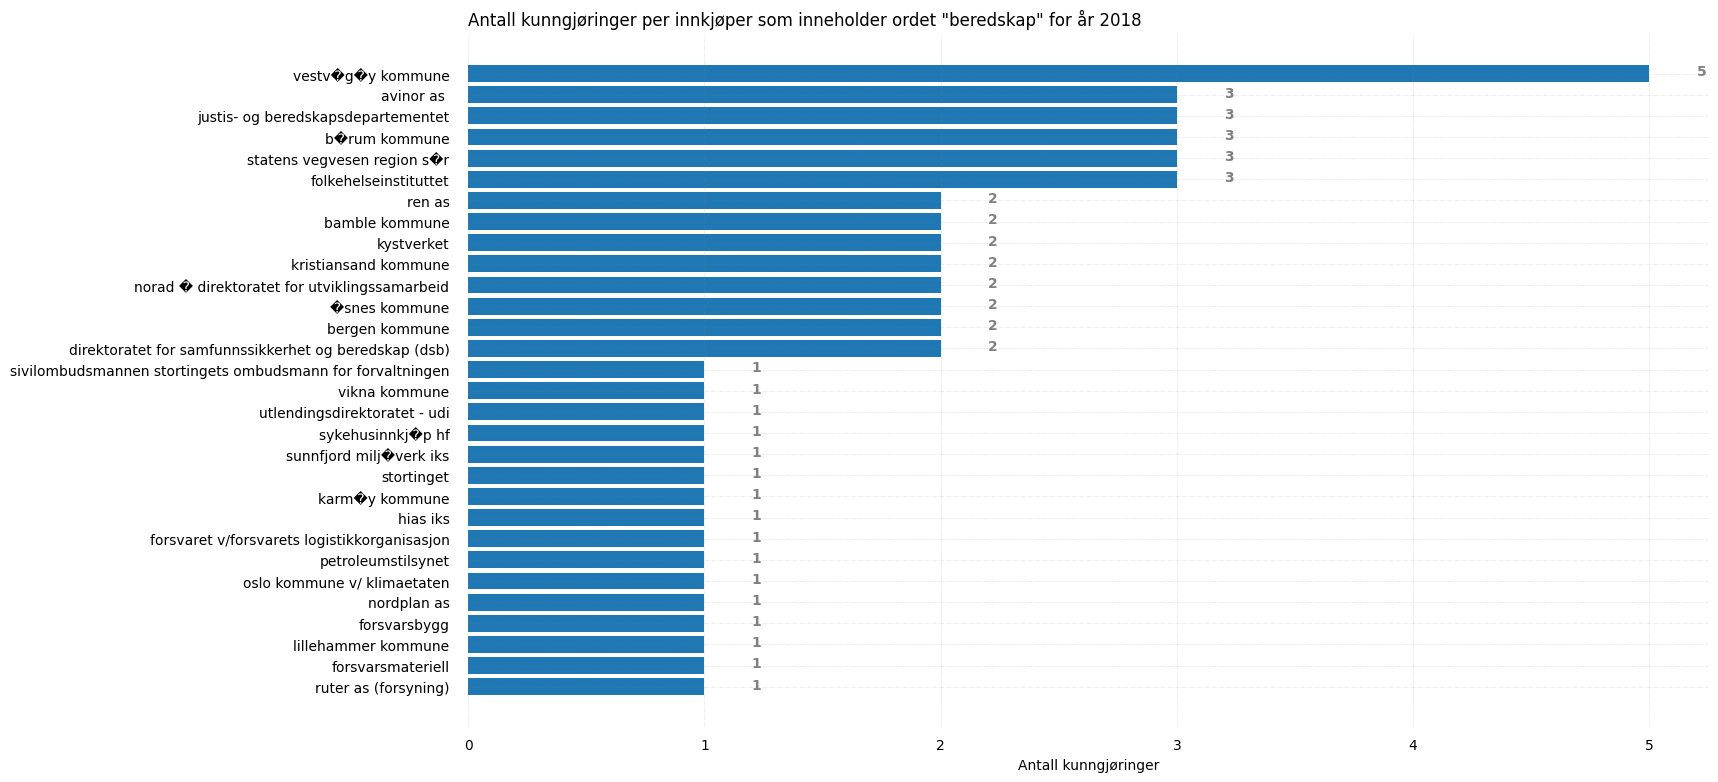

In [95]:
plot_procurement(freq_df_2018, 2018)

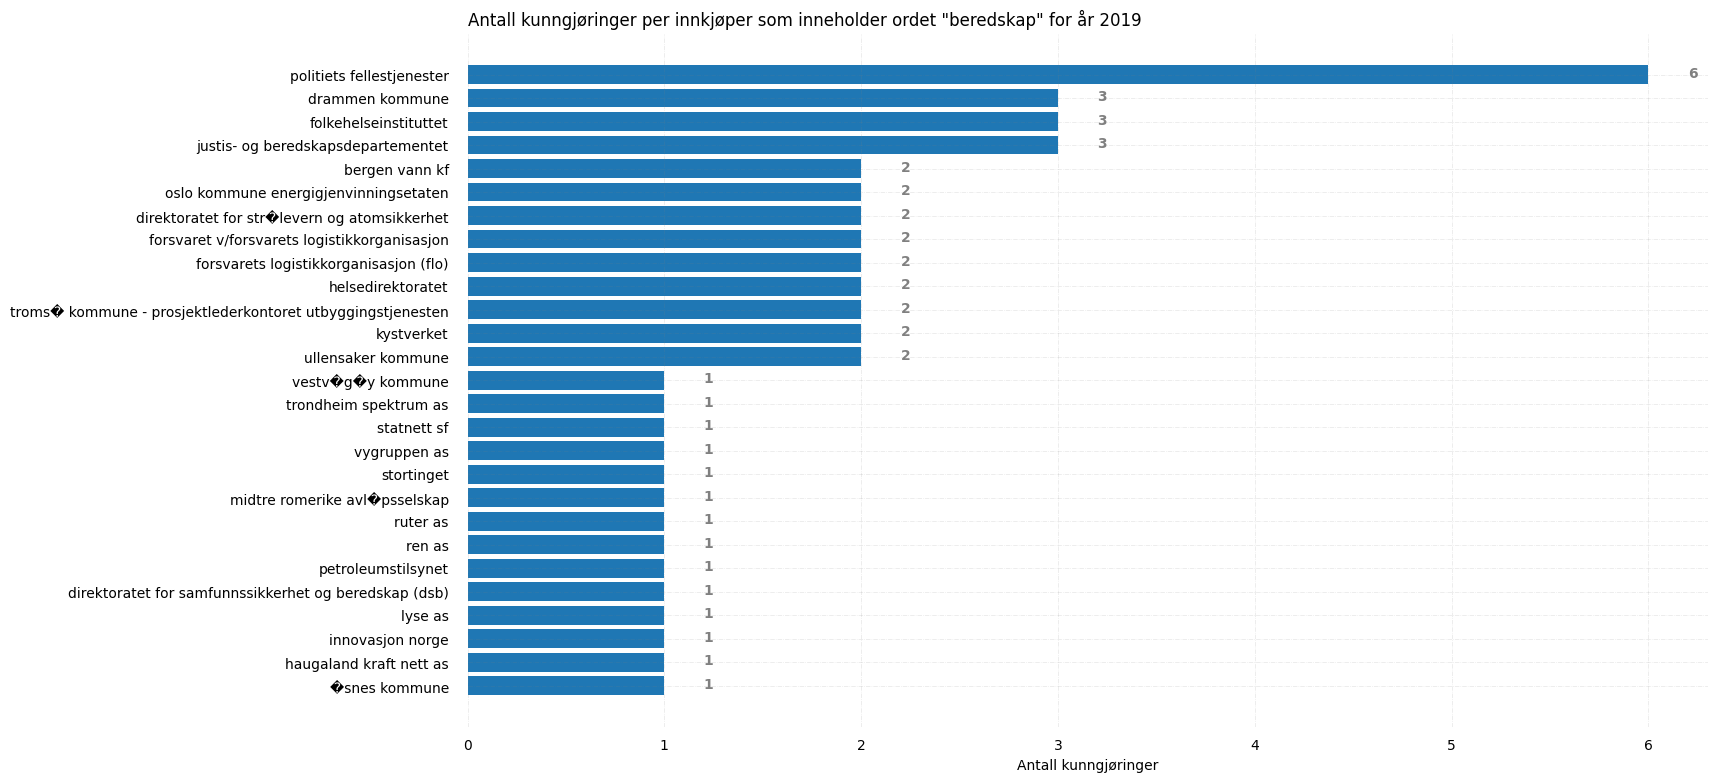

In [96]:
plot_procurement(freq_df_2019, 2019)

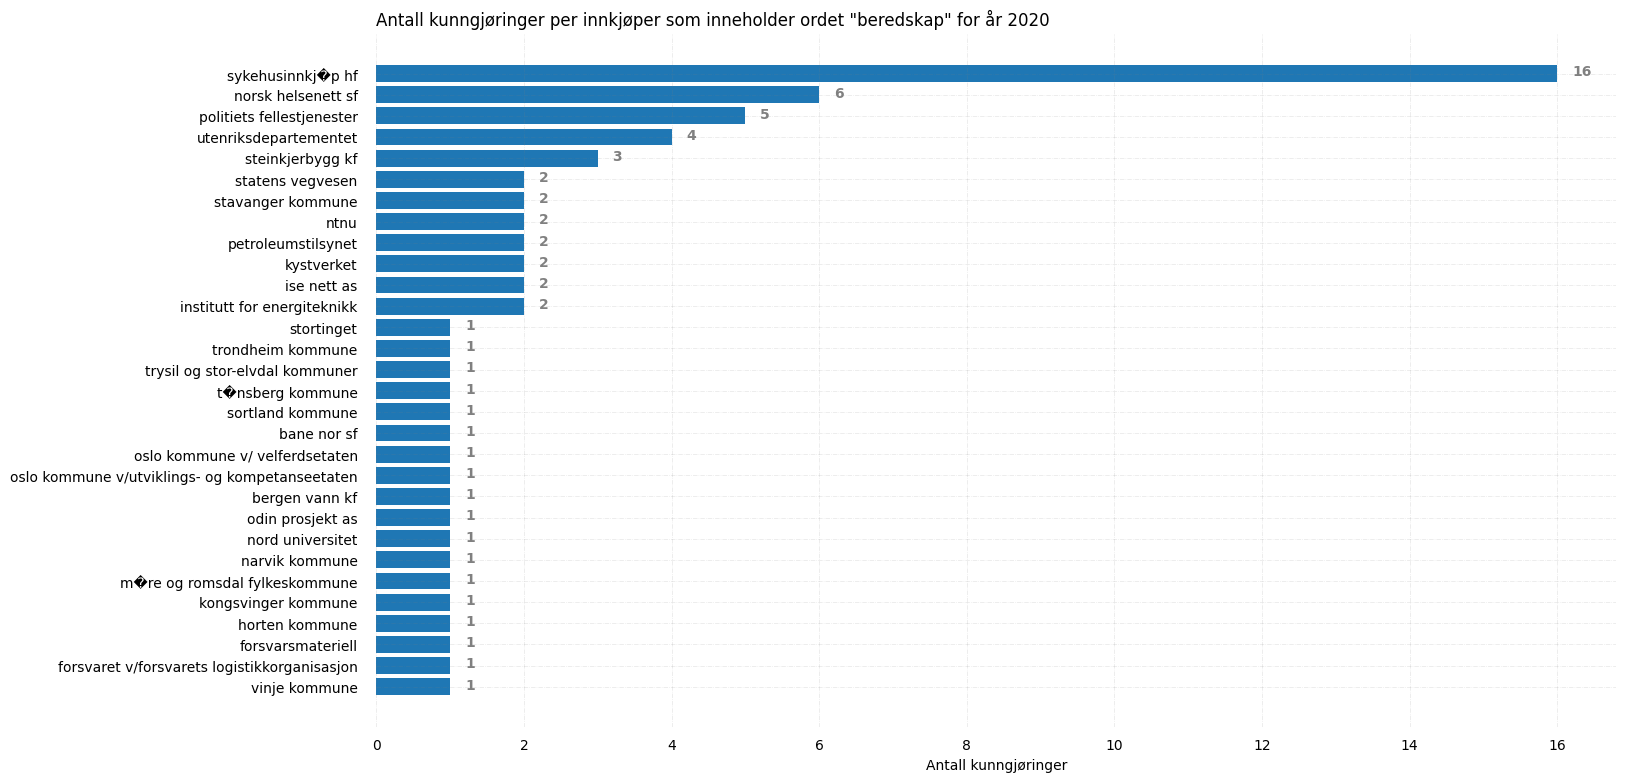

In [97]:
plot_procurement(freq_df_2020, 2020)

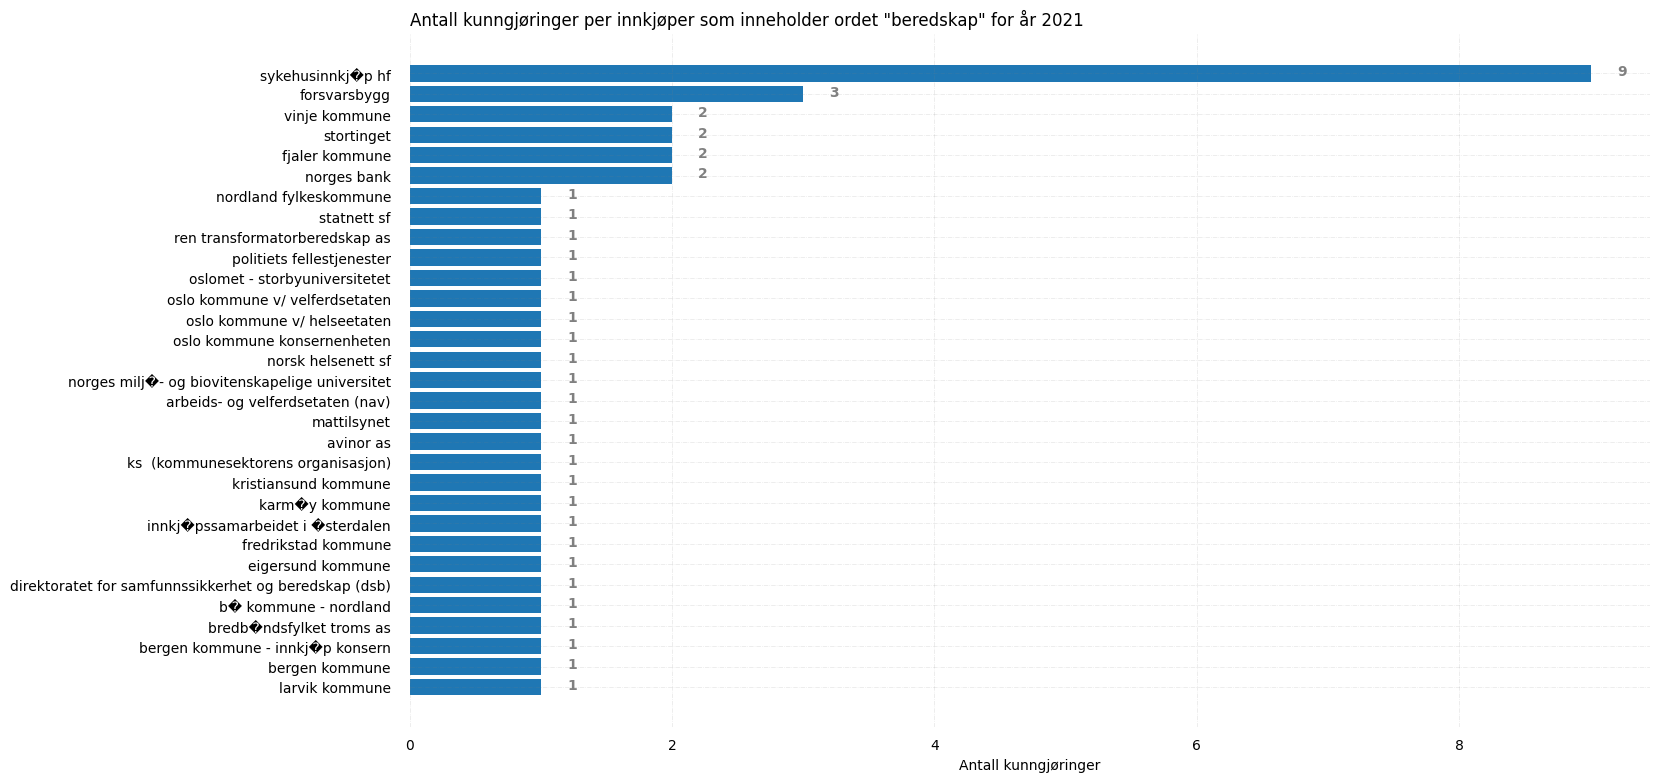

In [98]:
plot_procurement(freq_df_2021, 2021)

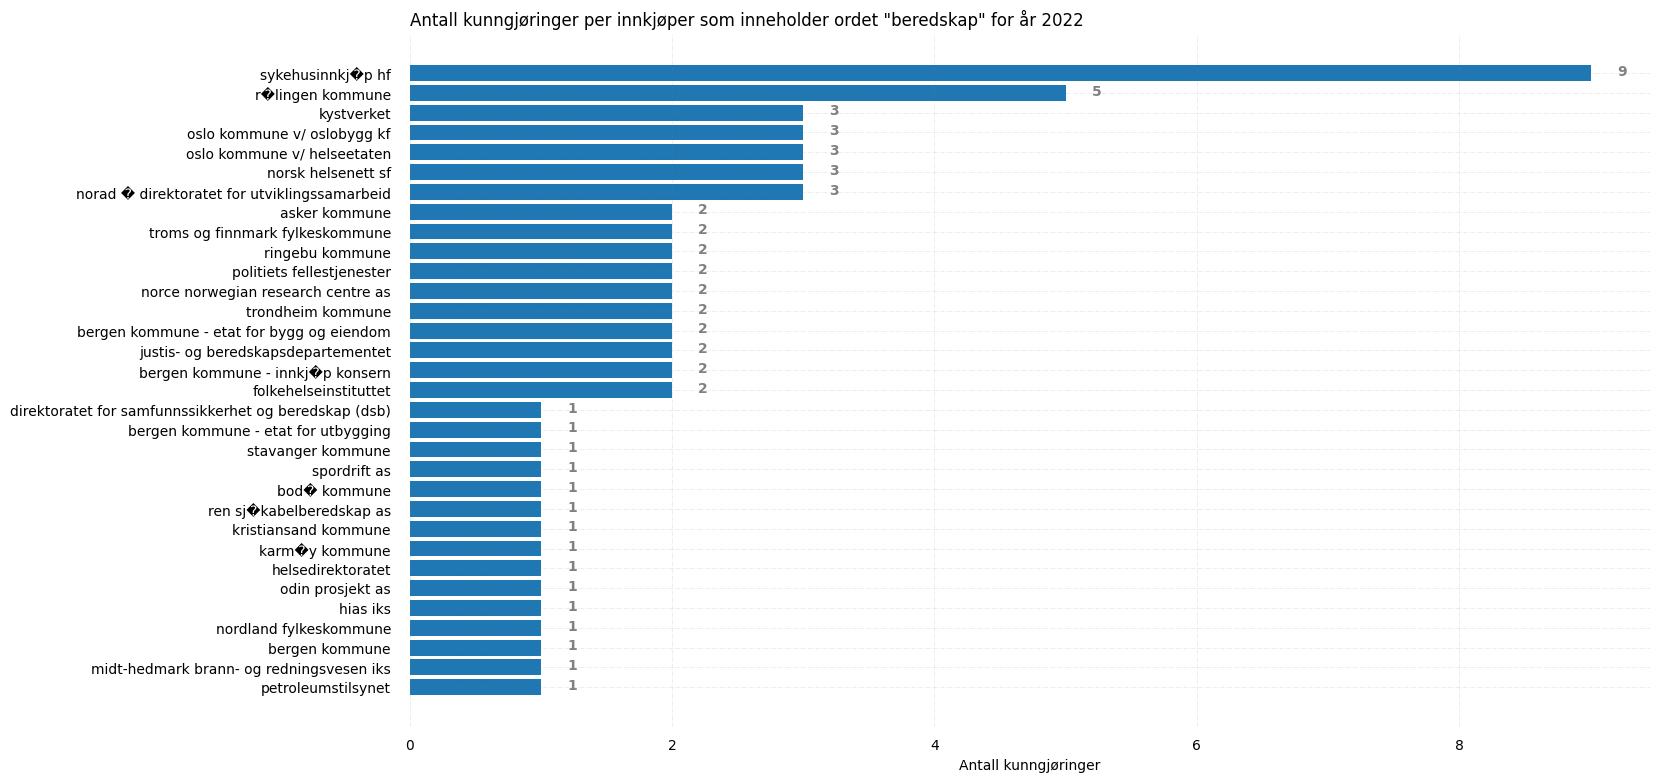

In [99]:
plot_procurement(freq_df_2022, 2022)